<a href="https://colab.research.google.com/github/mhodierne1402/data-science-ml-portfolio/blob/main/image-caption-generator/Image_Caption_Generator_CNN_RNN_Model_STAGE_1_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Caption Generator Project — CNN-RNN Model**
### **STAGE 1 — Baseline CNN-RNN Model**

Mark Hodierne, January 2023.

---

#### ***Status Update: 24 January 2023***

1. My baseline CNN-RNN model is complete.
1. Training has been optimized and BLEU scores generated to assess the performance of the image caption generator.
1.  Next steps: finalize reporting of performance metrics, complete documentation, then start to work on testing ways to optimize the model.





---

### **About this project**

The goal of this project is to develop an AI system capable of automatically generating detailed textual captions that describe the content of images. I will be exploring different deep learning architectures that use computer vision and natural language processing techniques to achieve this goal.

Models will be trained on a dataset of images paired with human-written captions. I will use the Flickr8k dataset for this purpose. The dataset consists of 8000 unique images and each image is described by five different sentences. By associating each image with multiple, independently produced sentences, the dataset captures some of the linguistic variety that can be used to describe the same image.

Once the models are trained, I will then see whether they are able to take unseen images and translate them into natural language descriptions that accurately describe the image content.

Three main architectures will be explored in turn:
+ A convolutional neural network plus recurrent neural network architecture
+ An attention-based mechanism which improves relevancy through visual guidance, and
+ Transformer models designed for parallelized computation and enhanced contextual modeling through self-attention



---

### **Implementation using a CNN encoder and RNN decoder model**

This notebook presents the first architecture that I'm exploring - a Convolutional Neural Network (CNN) plus a Recurrent Neural Network (RNN) architecture. The Image Captioning task requires these two deep learning models to be combined into one.

Firstly, the CNN is used as an encoder to extract the features of each image into a vector representation, so-called vector embeddings.

Building a CNN for this task from scratch would be an immense undertaking because of the time it would require to train the model. It takes a lot of computational resources and time to train a computer vision neural network model on a large dataset of images. This time and resources can be shortened by using pre-trained models. The technique of leveraging feature representation from a pre-trained model is called transfer learning.

There are a lot of pre-trained models available for this task, such as VGG-16, InceptionV3, and ResNet. I will use the InceptionV3 model, which has the least number of training parameters in comparison to the others and also outperforms them.

Secondly, an RNN is used as a decoder to generate a caption for each image vector embedding passed from the CNN. Specifically, I will implement a specific type of RNN decoder known as an LSTM (Long Short Term Memory), which is commonly used for text generation processes.

To encode each text sequence I will map every word to a 200-dimensional vector. To achieve this, I will use another pre-trainedmodel called GloVe.

Finally, I will need to implement a method of generating a caption for an image that the model has not previously seen. Two popular choices for this task are Greedy Search and Beam Search. I will try each of these methods to compare how well they help in picking the best words to accurately define an image.


### **STAGE 1 — Building a Baseline CNN-RNN Model**

The work to develop the CNN-RNN Model will be completed in two steps. In Stage 1, I will build a 'baseline' model that successfully carries out the task of generating captions for previously unseen images. The performance of this model will be measured, and these metrics will serve as the baseline against which optimization actions can be assessed.

The process for building the CNN-RNN model will be as follows:

### **1. Setup:**

- Connect to Google Drive and Kaggle
- Load the Flickr8k dataset from Kaggle
- Load the Python libraries required for the project
- Set path names for saving/loading files on Google Drive

### **2. Images:**

- Explore the Flickr8k images in the dataset
- Use InceptionV3’s pre-processing to transform the Flickr8k images to 299x299 images
- Store all the pre-processed images in an images dictionary indexed by image id
- Create train, validation and test datasets; each a subset of the images dictionary
- Remove the softmax layer from the InceptionV3 model as only feature vectors are required for each image
- Use InceptionV3 to generate feature vectors for all images in each of the train, validation and test dictionaries
- Save these encoded image datasets to disk for easy re-use

#### **3. Captions:**

- Explore the captions in the Flickr8k dataset
- Pre-process the captions to result in lowercase a-z text; add ‘startseq’ and ‘endseq’ to the beginning and end of each phrase
- Split the captions into train, validation and test datasets; each a dictionary with the same keys as the corresponding image dictionary
- Create a single list of all captions and use to create a tokenizer
- Save the word index created by the tokenizer
- Import the GloVe 6B Model used to generate word embeddings
- Create an index of the GloVe model's 200 dimension word embeddings
- Create an embedding matrix that stores the 200 dimension word embedding for each of the words in the word index (the Flickr8k vocabulary)

#### **4. Model:**

- Create a Neural Network that takes the training set of image feature vectors and the training set of word embeddings as inputs
- Use the embedding matrix (the pre-trained GloVe vectors) to set the weights in the embedding layer of the model
- Compile the model using categorical crossentropy as the loss function, and the Adam optimization as the stochastic gradient descent method
- Create a data generator to enable the model to be trained in batches
- Fit the model using the generator function and specifying the number of training epochs
- Review the performance of the model by comparing loss and accuracy metrics for the training dataset and the validation dataset; identify the optimum number of epochs for training

#### **5. Decoding:**

- Implement a Greedy Search algorithm that uses the highest probability next word generated by the model to build a caption one word at a time for images in the test dataset (previously unseen by the model)
- Implement a Beam Search algorithm and compare the  performance with Greedy Search

#### **6. Performance:**

- Examine the performance of the model on the test dataset
- Implement the BLEU Score to measure the quality of the model generated captions
- Provide options for improving the performance for the model and outline what will be tested in [STAGE 2 — Optimize CNN-RNN Model](https://github.com/mhodierne1402/data-science-ml-portfolio/blob/main/image-caption-generator/Image_Caption_Generator_CNN_RNN_Model_STAGE_2_Optimize.ipynb)


#### **7. Conclusions:**

- Summary of the final baseline model and the best performance achieved
- Recommendations for optimizing the model further
- Summary of insights and learning during the project work


Evaluate perplexity of LSTM on validation set during training.
To improve performance, hyperparameters to tune are: CNN architecture depth, LSTM hidden units, learning rates, dropout rates, batch size, and training epochs.
Can also try different optimization methods like RMSprop, Adam. And regularization techniques like early stopping, weight decay.

---

# **1. Setup**

- Connect to Google Drive and Kaggle
- Load the Flickr8k dataset from Kaggle
- Load the Python libraries required for the project
- Set path names for saving/loading files on Google Drive


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
''' Enable dataset downloads from Kaggle

    Before running this code, complete these actions:
        Click the Account tab in Kaggle and then scroll down to the API section
        Click 'Create New API Token'
        A file named “kaggle.json” will be download which contains the username
            and the API key
        Upload the “kaggle.json” file to the Colab notebook
'''

# Install the Kaggle library
! pip install kaggle

# Make a directory named “.kaggle”
! mkdir ~/.kaggle

# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

# Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

# The colab notebook is now ready to download datasets from Kaggle

In [ ]:
# Load Flickr8k dataset from Kaggle and save to Google Drive
! kaggle datasets download adityajn105/flickr8k
! mkdir "/content/gdrive/My Drive/Colab Data/Flickr8k Dataset"
! unzip -q flickr8k.zip -d "/content/gdrive/My Drive/Colab Data/Flickr8k Dataset"


In [1]:
# Import all Python libraries needed for the project

import os
import re
import random
import pickle
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

from keras import Input, layers
from keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, Dense, Activation
from keras.layers import Flatten, Reshape, Dropout, add
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, load_model
from keras.utils import plot_model, to_categorical
from keras.callbacks import EarlyStopping

#from keras.callbacks import ModelCheckpoint

# Paths
current_directory = os.getcwd()
image_path = current_directory \
        + '/gdrive/My Drive/Colab Data/Flickr8k Dataset/Images/'
captions_path = current_directory \
        + '/gdrive/My Drive/Colab Data/Flickr8k Dataset/'
glove_path = current_directory \
        + '/gdrive/My Drive/Colab Data/GloVe.6B Model/'
working_directory = current_directory \
        + '/gdrive/My Drive/Colab Data/Working Directory/'


---

# **2. Images**

### **2.1 Pre-processing and train-validation-test splitting**

- Explore the Flickr8k images in the dataset
- Use InceptionV3’s pre-processing to transform the Flickr8k images to 299x299 images
- Store all the pre-processed images in an images dictionary indexed by image id
- Create train, validation and test datasets; each a subset of the images dictionary

The Flickr8k dataset downloaded from Kaggle contains a file 'captions.txt' and a directory 'Images', which contains a single set of images in JPG format.

The captions file is in TXT format and each line contains an image file name, such as '1000268201_693b08cb0e.jpg', and an associated caption. I will refer to the image file name as its 'id'. An image id is repeated on 5 consecutive lines - each associating the image with a different caption. The data is separated by commas, so I can treat this as a CSV file and read it into a Pandas Dataframe.

In [2]:
# Preview the Flickr8k dataset
data = pd.read_csv(f'{captions_path}captions.txt')
print(data.head(10))


                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   
5  1001773457_577c3a7d70.jpg   
6  1001773457_577c3a7d70.jpg   
7  1001773457_577c3a7d70.jpg   
8  1001773457_577c3a7d70.jpg   
9  1001773457_577c3a7d70.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  
5         A black dog and a spotted dog are fighting  
6  A black dog and a tri-colored dog playing with...  
7  A black dog and a white dog with brown spots a...  
8  Two dogs of different breeds looking at each o...  
9    Two dogs on pavement moving toward each other .  


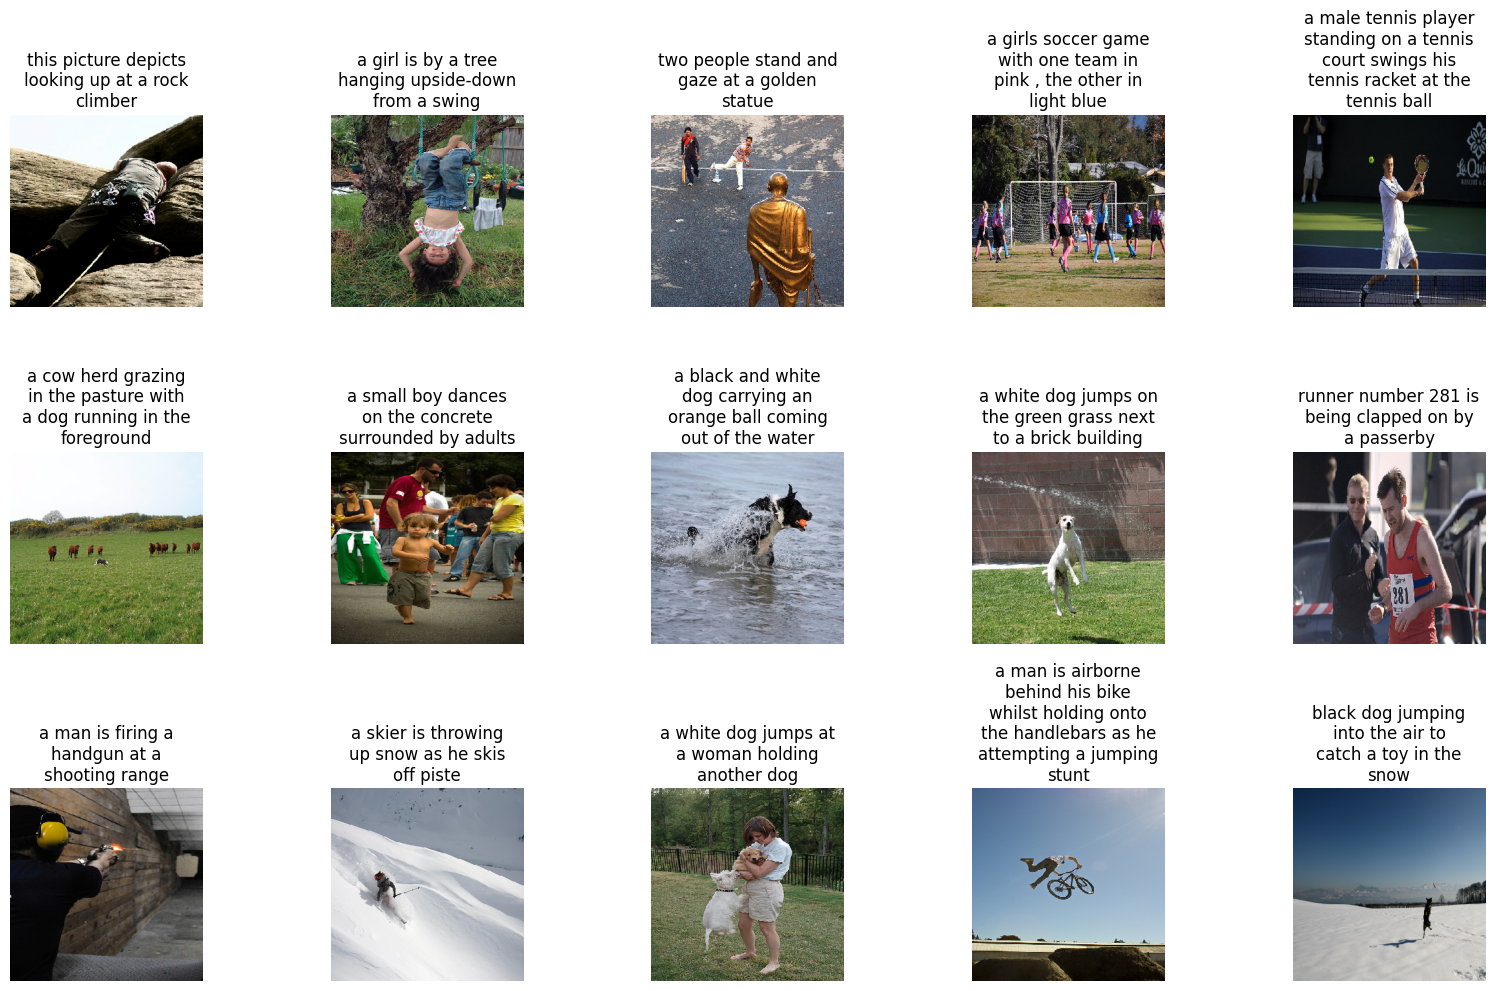

In [3]:
def read_image(path, img_size=299):
    # Load and resize an image in square format
    # and convert it to an array representation

    img = load_img(path, target_size=(img_size, img_size))
    img = img_to_array(img)/255.

    return img


def show_sample_images(df):
    # Display a set of images and their associated captions

    df = df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))

    for i in range(len(df)):
        plt.subplot(5 , 5, i+1)
        plt.subplots_adjust(hspace=0.75)
        image = read_image(image_path + df.image[i])
        caption = df.caption[i]
        caption = caption.replace('.', '').strip().lower()
        text = textwrap.fill(caption, 20)

        plt.imshow(image)
        plt.title(text)
        plt.axis("off")

    return


# Create a random sample of images and display
show_sample_images(data.sample(15))


As I am using InceptionV3 as the pre-trained model to generate feature vectors for the Flickr8k images, I need to use the same image pre-processing method that has been used to train the InceptionV3 model

Images passed to InceptionV3 need to be converted from their JPEG format. Each pixel of an image is specified using the RGB (Red, Blue, Green) colour model. Each of the three colour channels is represented by an integer value between 0 and 255 - the combination of the three values describes the colour of the pixel. InceptionV3 requires images to be sized at 299x299 pixels, so the dimensions of the image array need to be 299x299x3.

Additionally, as InceptionV3 might expect to receive large numbers of images to process, it is able to process data in 'batches'. Accordingly, the batch size needs to be specified when providing data. My code below, is pre-processing images one at a time, and so I need to specify a batch size of 1. Hence, each batch provided to InceptionV32 is a 4D array with dimensions (batch_size, height, width, channels), or (1, 299, 299, 3).

The main work that InceptionV3's pre-processing is doing is to ensure that the digital representation of the image is in the expected format, to perform mean subtraction (centering the data around zero), and to normalize the pixel values into a range of -1 to +1. This ensures numerical stability and helps to improve the efficacy of the training process.

After I load and pre-process each image, it is added to an 'images' dictionary, indexed by image id.


In [4]:
def preprocess_image(path, img_size):
    # Pre-processing image as an array of normalized pixel values
    img = load_img(path, target_size=(img_size, img_size))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Added dimension to specify batch size
    img = preprocess_input(img)

    return img


def load_images(path, img_size=299):
    # Create a dictionary of pre-processed images indexed by image id
    images = {}

    for name in tqdm(listdir(path)):
        filename = path + '/' + name
        images[name] = preprocess_image(filename, img_size)

    return images


# Load images
images = load_images(image_path)
print(f'Number of loaded images: {len(images)}')


  0%|          | 0/8115 [00:00<?, ?it/s]

Number of loaded images: 8115


The Flickr8k dataset has now been pre-processed for the purposes of caption generation in this project. Now, the images need to be split into training, validation and test sets (their associated captions will be similarly split when I've completed the caption pre-processing).

The Flickr8k dataset isn't an especially large one, so I have decided that the training set should be 80% of the total images, and the validation and test sets should both be 10% of the total images.

In [5]:
# Use image ids to create datasets for training, validation and testing
image_ids = data['image'].unique().tolist()
total_num_images = len(image_ids)

train_image_ids, test_image_ids = train_test_split(
        image_ids, test_size=0.2, random_state=21)
test_image_ids, val_image_ids = train_test_split(
        test_image_ids, test_size=0.5, random_state=33)

train_images = {key: images[key] for key in train_image_ids if key in images}
val_images = {key: images[key] for key in val_image_ids if key in images}
test_images = {key: images[key] for key in test_image_ids if key in images}

print(f'Number of images in complete dataset: {total_num_images}')
print(f'Number of images in train dataset: {len(train_image_ids)}')
print(f'Number of images in validation dataset: {len(val_image_ids)}')
print(f'Number of images in test dataset: {len(test_image_ids)}')


Number of images in complete dataset: 8091
Number of images in train dataset: 6472
Number of images in validation dataset: 810
Number of images in test dataset: 809


---

### **2.2 Image feature extraction**

- Remove the softmax layer from the InceptionV3 model as only feature vectors are required for each image
- Use InceptionV3 to generate feature vectors for all images in each of the train, validation and test dictionaries
- Save these encoded image datasets to disk for easy re-use


InceptionV3 was trained on the ImageNet dataset - a large-scale visual recognition dataset that consists of millions of labeled images across thousands of object categories. It is widely used as a benchmark dataset for image classification tasks.

I have used this pre-trained model to extract the feature vectors for each of the images from the Flickr8k dataset. I generated encoded versions of the train, validate and test datasets, and saved these as files that can be subsequently loaded and used for training the language model.

Essentially, the feature extraction model and the language model are separate. I can put them together later as a single model for making predictions on new images.

In [6]:
model = InceptionV3(weights='imagenet')

# Remove the softmax layer from the model as we only need to extract a feature
# vector for an image
model_new = Model(model.input, model.layers[-2].output)

def encode(img):
    # Use InceptionV3 to feature encode an image and return this
    # as a feature vector
    fea_vec = model_new.predict(img, verbose=0)
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1])
    return fea_vec


# Build feature vector dictionaries corresponding to the train,
# validate and test datasets
encoded_train_images = {
        id: encode(img) for id, img in tqdm(train_images.items())}
encoded_val_images = {
        id: encode(img) for id, img in tqdm(val_images.items())}
encoded_test_images = {
        id: encode(img) for id, img in tqdm(test_images.items())}

# Save image features to pickle
pickle.dump(encoded_train_images,
            open(f'{working_directory}encoded_train_images.pkl', 'wb'))
pickle.dump(encoded_val_images,
            open(f'{working_directory}encoded_val_images.pkl', 'wb'))
pickle.dump(encoded_test_images,
            open(f'{working_directory}encoded_test_images.pkl', 'wb'))



96112376/96112376 [==============================] - 1s 0us/step


  0%|          | 0/6472 [00:00<?, ?it/s]

  0%|          | 0/810 [00:00<?, ?it/s]

  0%|          | 0/809 [00:00<?, ?it/s]

In [34]:
# Load image features from pickle
with open(f'{working_directory}encoded_train_images.pkl', 'rb') as f:
    encoded_train_images = pickle.load(f)
with open(f'{working_directory}encoded_val_images.pkl', 'rb') as f:
    encoded_val_images = pickle.load(f)
with open(f'{working_directory}encoded_test_images.pkl', 'rb') as f:
    encoded_test_images = pickle.load(f)


---

# **3. Captions**

### **3.1 Pre-processing and train-validation-test splitting**

- Explore the captions in the Flickr8k dataset
- Pre-process the captions to result in lowercase a-z text; add ‘startseq’ and ‘endseq’ to the beginning and end of each phrase
- Split the captions into train, validation and test datasets; each a dictionary with the same keys as the corresponding image dictionary; the captions for each image are stored as a list


Scanning through the captions.txt file, I can see a number of actions that need to be taken to pre-process the text descriptions:
+ convert all text to lower case
+ remove punctuation e.g. ".,'?:;!-
+ remove tokens of one character e.g. ‘a’ and hanging ‘s’ characters
+ remove numbers
+ remove excess white space
+ add starting and ending tags to each description

Finally, I need to load all of the descriptions into a dictionary so they can be accessed using the image file id as the key.


In [7]:
# Preview the Flickr8k dataset
data = pd.read_csv(f'{captions_path}captions.txt')
pd.set_option('display.max_colwidth', None)
print(data.caption[:10])

0                  A child in a pink dress is climbing up a set of stairs in an entry way .
1                                                     A girl going into a wooden building .
2                                          A little girl climbing into a wooden playhouse .
3                                      A little girl climbing the stairs to her playhouse .
4                                 A little girl in a pink dress going into a wooden cabin .
5                                                A black dog and a spotted dog are fighting
6                   A black dog and a tri-colored dog playing with each other on the road .
7    A black dog and a white dog with brown spots are staring at each other in the street .
8                          Two dogs of different breeds looking at each other on the road .
9                                           Two dogs on pavement moving toward each other .
Name: caption, dtype: object


In [8]:
def preprocess_text(caption):
    # Use regular expressions to pre-process a caption
    caption = caption.lower()                     # converts to lower case
    caption = re.sub(r'[^a-z\s]', ' ', caption)   # retains a-z and spaces
    caption = re.sub(r'\b\w\b', '', caption)      # remove single char tokens
    caption = re.sub(r'^', 'startseq ', caption)  # adds a tag at the start
    caption = re.sub(r'$', ' endseq', caption)    # adds a tag at the end
    caption = re.sub(r'\s+', ' ', caption)        # deletes excess space

    return caption


# Load and pre-process image captions
data = pd.read_csv(f'{captions_path}captions.txt')
data.caption = data.caption.apply(preprocess_text)

# Create an array of captions that correspond to each image and save as a
# dictionary with image id as the index. Create dictionaries for each of the
# train, validate and test datasets
captions, train_captions, val_captions, test_captions = {}, {}, {}, {}

for index, row in data.iterrows():
    if row.image not in captions:
        captions[row.image] = []
    captions[row.image].append(row.caption)

    if row.image in encoded_train_images:
        captions_dict = train_captions
    elif row.image in encoded_val_images:
        captions_dict = val_captions
    elif row.image in encoded_test_images:
        captions_dict = test_captions
    else:
        continue

    if row.image not in captions_dict:
        captions_dict[row.image] = []
    captions_dict[row.image].append(row.caption)

# Save captions to pickle
pickle.dump(train_captions,
            open(f'{working_directory}train_captions.pkl', 'wb'))
pickle.dump(val_captions,
            open(f'{working_directory}val_captions.pkl', 'wb'))
pickle.dump(test_captions,
            open(f'{working_directory}test_captions.pkl', 'wb'))

# Check results
print(data.caption[:10])
print(f'\nNumber of total caption arrays (= num total images): {len(captions)}')
print(f'Number of training set captions (= num train dataset images): {len(train_captions)}')
print(f'Number of validation set captions (= num validation dataset images): {len(val_captions)}')
print(f'Number of test set captions (= num test dataset images): {len(test_captions)}\n')


0                    startseq child in pink dress is climbing up set of stairs in an entry way endseq
1                                                     startseq girl going into wooden building endseq
2                                          startseq little girl climbing into wooden playhouse endseq
3                                    startseq little girl climbing the stairs to her playhouse endseq
4                                   startseq little girl in pink dress going into wooden cabin endseq
5                                              startseq black dog and spotted dog are fighting endseq
6                   startseq black dog and tri colored dog playing with each other on the road endseq
7    startseq black dog and white dog with brown spots are staring at each other in the street endseq
8                      startseq two dogs of different breeds looking at each other on the road endseq
9                                       startseq two dogs on pavement moving towar

In [ ]:
# Load captions from pickle
with open(f'{working_directory}train_captions.pkl', 'rb') as f:
    train_captions = pickle.load(f)
with open(f'{working_directory}val_captions.pkl', 'rb') as f:
    val_captions = pickle.load(f)
with open(f'{working_directory}test_captions.pkl', 'rb') as f:
    test_captions = pickle.load(f)

---

### **3.2 Tokenization**

- Create a single list of all captions and use to create a tokenizer
- Save the word index created by the tokenizer


Next, I create a 'tokenizer' using the corpus (all captions in the Flickr8k dataset). Each word is integer encoded and a caption becomes a list of integers. There are 5 captions for each of the 8427 images, and the longest caption consists of 35 words (including the 'startseq' and 'endseq' tokens added during pre-processing).

The tokenizer also creates an index that can be used to access the encoding for each word. This is the word's position in the overall vocabulary built during tokenization.

Two other pieces of information that we need from the tokenization process are the vocabulary size and the maximum length of any caption. The vocabulary size is incremented by 1 because we are going to be using the integer zero to 'pad' captions so that they all have the same length. And that length is given by the maximum length of any caption.

In [9]:
# Create a list of all captions
all_captions = [caption for captions_list in captions.values()
                for caption in captions_list]
print(f'Total number of captions: {len(all_captions)}')

# Create the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)

# Mapping of words to index position in the vocabulary
word_index = tokenizer.word_index

vocab_size = len(word_index) + 1  # Add 1 for the zero-padding
print(f'Vocabulary size: {vocab_size}')

# Find the longest caption
max_length = max(len(caption.split()) for caption in all_captions)
print(f'Max length of caption: {max_length}')


Total number of captions: 40455
Vocabulary size: 8427
Max length of caption: 35


---

### **3.3 GloVe Model and Embedding Matrix**

- Import the GloVe 6B Model used to generate word embeddings
- Create an index of the GloVe model's 200 dimension word embeddings
- Create an embedding matrix that stores the 200 dimension word embedding for each of the words in the word index (the Flickr8k vocabulary)

Once the words are tokenized I can generate word vectors for each word. Word vectors that represent similar words will be clustered together when mapped to a vector space; word vectors that represent different words will appear more separated.

Similarly to how I used a pre-trained model to generate the image embeddings, the word vectors, or embeddings, can be generated using a pre-trained model. I am going to use a model called GloVe that leverages global statistics of word co-occurrence across the entire corpus that was used for training.

An alternative model like Word2Vec generates embeddings based on the local context of words in a sentence, and consequently GloVe has a deeper understanding of word context. GloVe also has fewer hyperparameters than Word2Vec.

GloVe will be used to translate each of the 35 word captions into a high dimension vector - this can be chosen to be 50, 100, 200 or 300 dimensions. The embedding matrix that results is saved, and can be later accessed to to set the default weights of the neural network before the model is compiled.

In [ ]:
# Load GloVe model and save to Google Drive
! wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
! mkdir "/content/gdrive/My Drive/Colab Data/GloVe.6B Model"
! unzip -q glove.6B.zip -d "/content/gdrive/My Drive/Colab Data/GloVe.6B Model"


In [10]:
# Create an index of the GloVe model's 200 dimension word embeddings
embedding_dim = 200
path_to_glove_file = f'{glove_path}glove.6B.{embedding_dim}d.txt'

embeddings_index = {}
f = open(path_to_glove_file)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.\n')


# Create a matrix of shape (8427,200) - 200 dimension word vectors
# for each word in the vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(embedding_matrix[23])
print(f'\nEmbeddings generated for {len(embedding_matrix)} words.')

# Save embedding_matrix to pickle
pickle.dump(embedding_matrix,
            open(f'{working_directory}embedding_matrix.pkl', 'wb'))


Found 400000 word vectors.

[ 4.10600007e-03 -1.59889996e-01  4.50390019e-03  5.34399986e-01
 -6.90359995e-02  5.48560023e-01 -7.83630013e-01 -5.78639992e-02
 -4.61620003e-01 -8.06370020e-01 -4.42209989e-01  7.10919976e-01
 -1.64360002e-01 -8.99259970e-02  1.37710005e-01  5.56330025e-01
 -5.85720003e-01  1.09480001e-01  8.09719980e-01 -1.56320006e-01
 -6.60679996e-01  2.70740008e+00  7.03099966e-02  1.81610003e-01
  9.60720003e-01 -9.24839973e-01 -1.52769999e-03  3.21229994e-01
 -3.22730005e-01  3.30339998e-01  2.74820000e-01 -5.41899979e-01
  3.37240010e-01  1.28089994e-01  3.77640009e-01 -2.20310003e-01
 -1.84230000e-01 -9.71549973e-02 -3.43780011e-01 -5.84309995e-01
 -4.74230014e-02  2.07550004e-01 -6.34059981e-02  3.09159994e-01
 -1.70750007e-01 -3.25869992e-02  2.39439994e-01  1.61420003e-01
 -6.06830008e-02  9.54879999e-01  7.46710002e-02  7.51639977e-02
 -1.22379996e-02  1.94169998e-01 -3.40440005e-01 -2.72650003e-01
 -1.69900000e-01  5.56050003e-01 -5.34479976e-01  6.54290020e-

In [12]:
# Load embedding_matrix from pickle
with open(f'{working_directory}embedding_matrix.pkl', 'rb') as f:
    embedding_matrix = pickle.load(f)


---

# **4. Model**

### **4.1 Neural Network Architecture**

- Create a Neural Network that takes the training set of image feature vectors and the training set of word embeddings as inputs
- Use the embedding matrix (the pre-trained GloVe vectors) to set the weights in the embedding layer of the model
- Compile the model using categorical crossentropy as the loss function, and the Adam optimization as the stochastic gradient descent method

I an using a neural network model organized into layers to perform three activities:

- Extracting the feature vector from the image  
- Processing the sequence from the text
- Decoding the output using softmax by concatenating the above two layers

The first input to the model is the image that has been encoded using the GloVe model. This


This mapping will be done in a separate layer after the input layer called the embedding layer.

`inputs1 = Input(shape=(2048,))`  
This input layer is expects a tensor with a shape of (2048,). This is often used for image features, where 2048 may represent the number of features extracted from an image using a convolutional neural network (CNN).

`fe1 = Dropout(0.5)(inputs1)`  
Layer `input1` connects to a dropout layer with a dropout rate of 0.5. Dropout is a regularization technique that randomly sets a fraction of input units to zero during training to help prevent overfitting.

`fe2 = Dense(256, activation='relu')(fe1)`  
The `fe1` dropout layer connects to a fully connected (Dense) layer with 256 units and a ReLU activation function applies a non-linear transformation the the output of each of the units. The input tensor has a shape of (2048,) and the output tensor has a shape (256,).

The purpose of this block is to introduce non-linearity and reduce the dimensionality of the feature vector obtained from InceptionV3. It helps in capturing more abstract and higher-level representations from the features extracted by the CNN model. The dropout layer also aids in preventing overfitting.

In summary, it's not additional feature extraction but rather a transformation and reduction of dimensionality of the features obtained from the InceptionV3 model before combining them with textual information in the subsequent part of the model.





Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 35)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 35, 200)              1685400   ['input_3[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 2048)                 0         ['input_2[0][0]']             
                                                                                            

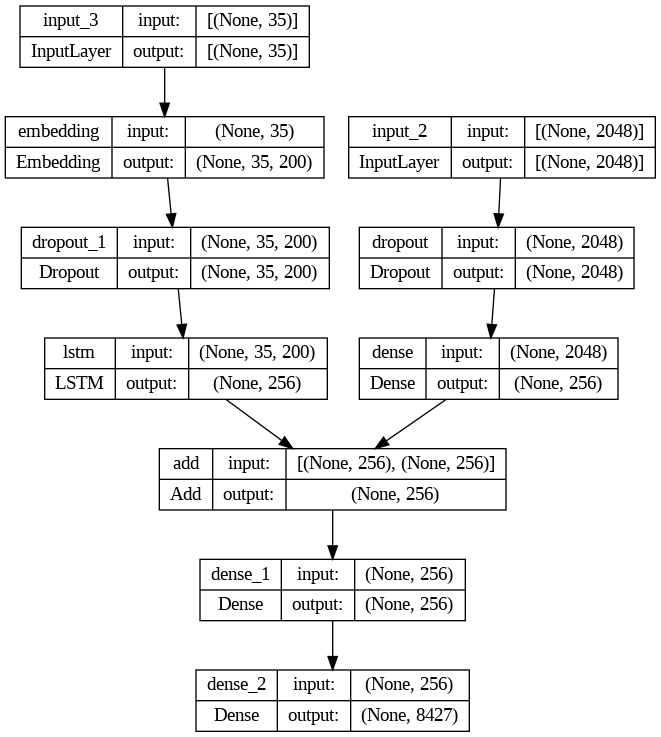

In [11]:
embedding_dim = 200

inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.summary()

# Before training the model, ensure not to retrain the weights
# in the embedding layer (pre-trained Glove vectors).

model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Plot the model
plot_model(model, show_shapes=True)


---

### **4.2 Data Generator and Model Training**

- Create a data generator to enable the model to be trained in batches
- Fit the model using the generator function and specifying the number of training epochs
- Review the performance of the model by comparing loss and accuracy metrics for the training dataset and the validation dataset; identify optimum number of epochs for training

Create a function that will generate batches of data for when I train the model.


Each description must be integer encoded. After encoding, the sequences are split into multiple input and output pairs and only the output word (y) is one hot encoded. This is because the model is only required to predict the probability distribution of one word at a time.

In [ ]:
def data_generator(photos, captions, max_length, batch_size):
    X1, X2, y = [], [], []
    n = 0

    while True:
        for img_id, caption_list in captions.items():
            photo = photos[img_id]
            n += 1
            for caption in caption_list:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # one-hot encode the output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)

            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = [], [], []
                n = 0

epochs = 10
batch_size = 16
train_steps = len(train_captions)//batch_size
val_steps = len(val_captions)//batch_size

# Define generators to provide batches of data during training
train_generator = data_generator(encoded_train_images, train_captions, max_length, batch_size)
val_generator = data_generator(encoded_val_images, val_captions, max_length, batch_size)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Fit the training data to the model
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_steps,
    verbose=1,
    validation_data=val_generator,
    validation_steps=val_steps,
    callbacks=[early_stopping]
)

# store model history in pickle
pickle.dump(history.history, open(f'{working_directory}history_run3.pkl', 'wb'))

# Save the model
model.save(f'{working_directory}cnn_rnn_model_e10-200.keras', overwrite=True)


In [9]:
# Load the saved model
model = load_model(f'{working_directory}cnn_rnn_model_e10-200.keras', custom_objects=None, compile=True, safe_mode=True)



Understanding the relationship between training accuracy and validation accuracy help to assess whether the model is underfitting, overfitting, or achieving a good balance. A well-balanced model has a high accuracy score for the training dataset and a comparable (but not too much lower) accuracy score for the validation dataset.

A high training accuracy, indicates that the model is learning from the data. A validation accuracy that is reasonably close to the training accuracy, suggests good generalization has been achieved. If there's a large gap between training and validation performance, it could be a sign of overfitting.

If the training loss continues to decrease, but the validation loss starts to increase or remains stagnant, it suggests that the model is overfitting to the training data and may not generalize well to new, unseen data.

Whilst metrics like loss and and accuracy help to determine that the model is generalizing well, they are not the best indicators of the model's performace against the task in hand - caption generation. For this, I shall use the Bilingual Evaluation Understudy Score, or BLEU - a metric that evaluates the accuracy of a generated sentence compared to a reference sentence. This is exactly what is required here to assess the quality of the caption generation achieved. The metric is widely adopted as it is quick and inexpensive to calculate, and it correlates well with human evaluation.

The training hyperparameters and design choices for the first version of the model were as follows:
- image dataset size: 8091 images - split 80% training set and 10% each for validation and test sets
- InceptionV3 pre-trained model for image feature extraction
- vocabulary size: 8427 words
- GloVe pre-trained model using 200 dimension vectors for word embedding
- training epochs: 25
- decoding strategy: Greedy Search

Experimenting iteratively with hyperparameters, training strategies, and options for the way the model is constructed will reveal the extent to which the performance of the existing model can be improved. In addition, trialling and optimizing alternative architectures may help to develop a higher performing model. My expectation at the outset of the project is that this particular CNN-RNN architecture will only perform moderately well, and that the other two architectures I plan to explore will generate improved results.


Best Epoch: 5
Best Loss: 3.2828261852264404
Best Accuracy: 0.30666521191596985


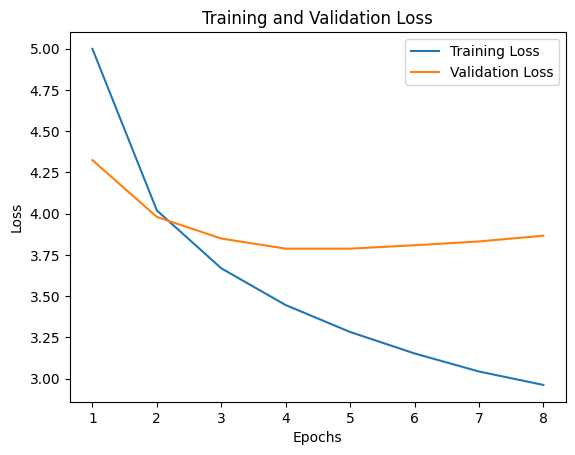

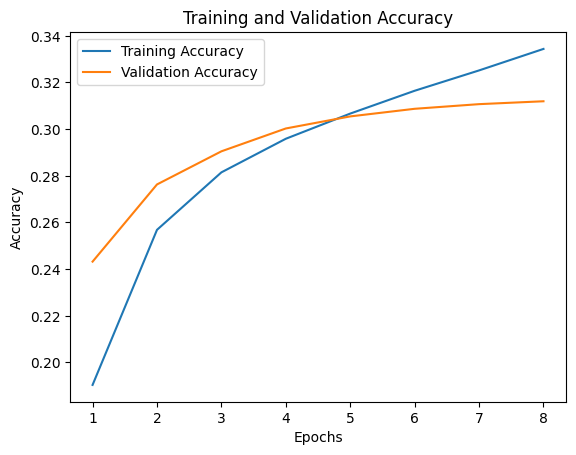

In [11]:
# load model history from pickle
with open(f'{working_directory}history_e10-200.pkl', 'rb') as f:
    history = pickle.load(f)
#with open(f'{working_directory}history_run2.pkl', 'rb') as f:
#    history2 = pickle.load(f)

# Create an aggregate of training history if the model is trained over more than one session
#history = {key: history1[key] + history2[key] for key in history1.keys()}

# Get loss and accuracy data for each epoch
train_loss = history['loss']
train_acc = history['accuracy']
val_loss = history['val_loss']
val_acc = history['val_accuracy']
epochs = range(1, len(train_loss) + 1)
best_epoch = val_loss.index(min(val_loss))
best_loss = train_loss[best_epoch]
best_accuracy = train_acc[best_epoch]

# Print optimal training results
print(f"Best Epoch: {best_epoch + 1}")
print(f"Best Loss: {best_loss}")
print(f"Best Accuracy: {best_accuracy}")

# Plot loss over epochs
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy over epochs
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The results:



---

# **5. Decoding**

### **5.1 Greedy Search**

- Implement a Greedy Search algorithm that uses the highest probability next word generated by the model to build a caption one word at a time for images in the test dataset (previously unseen by the model)


Greedy search is a simple decoding strategy where, at each time step, the word with the highest probability is selected as the next word in the sequence.

As the model generates a 8427 (the size of the vocabulary) long vector with a probability distribution across all the words in the vocabulary, we greedily pick the word with the highest probability to get the next word prediction. This method is called Greedy Search.

Greedy Search:
In greedy search, at each step of sequence generation, the model selects the most probable token based on the highest probability assigned by the model. The model makes a locally optimal choice at each step without considering the global context. While greedy search is computationally efficient, it may not always lead to the globally optimal sequence because it doesn't explore alternative paths.

Example (for machine translation):

Input: "I have a cat."
Model predictions at each step: "Je," "vais," "à," "un," "chat." (French translation)
Beam Search:
Beam search is a more sophisticated decoding strategy that considers multiple candidate sequences simultaneously. Instead of selecting only the most probable token at each step, beam search maintains a set of the top-k candidates, where "k" is a user-defined parameter called the beam width. At each step, the model scores all possible continuations of each candidate sequence, and the top-k candidates with the highest total scores are retained.

Example (for machine translation with beam width of 3):

Input: "I have a cat."
Candidate sequences:
"Je vais à un chat." (French translation)
"J'ai un chat." (French translation)
"C'est un chat." (French translation)
Beam search explores a broader search space compared to greedy search, which can lead to better overall sequence quality. However, it comes at the cost of increased computational complexity.

In summary, both greedy search and beam search are methods for generating sequences by selecting the most likely tokens at each step. Beam search extends this idea by maintaining multiple candidate sequences, making it more robust but computationally more demanding. The choice between these methods depends on the specific requirements and trade-offs in a given application.

3432634159_1eb9a73306.jpg ['startseq lady in dark coat is sitting with many people around her endseq', 'startseq shawled woman sits with others endseq', 'startseq small group of people sitting together outside endseq', 'startseq woman in headscarf sits near children in box decorated with flowers and balloons endseq', 'startseq the old woman is sitting with the children surrounded by streamers endseq']
477768471_d7cd618fdb.jpg ['startseq black and white dog is playing with golf ball in the sand endseq', 'startseq dog playing with golf ball in front of small wooden fence on the beach endseq', 'startseq dog plays in the sand with ball endseq', 'startseq white dog with black spots looks at golf ball in the sand endseq', 'startseq the dog eyes the ball before retrieving it endseq']
2855667597_bf6ceaef8e.jpg ['startseq four black dogs run across the grass endseq', 'startseq four black dogs running over grass endseq', 'startseq four black dogs run together on bright green grass endseq', 'star

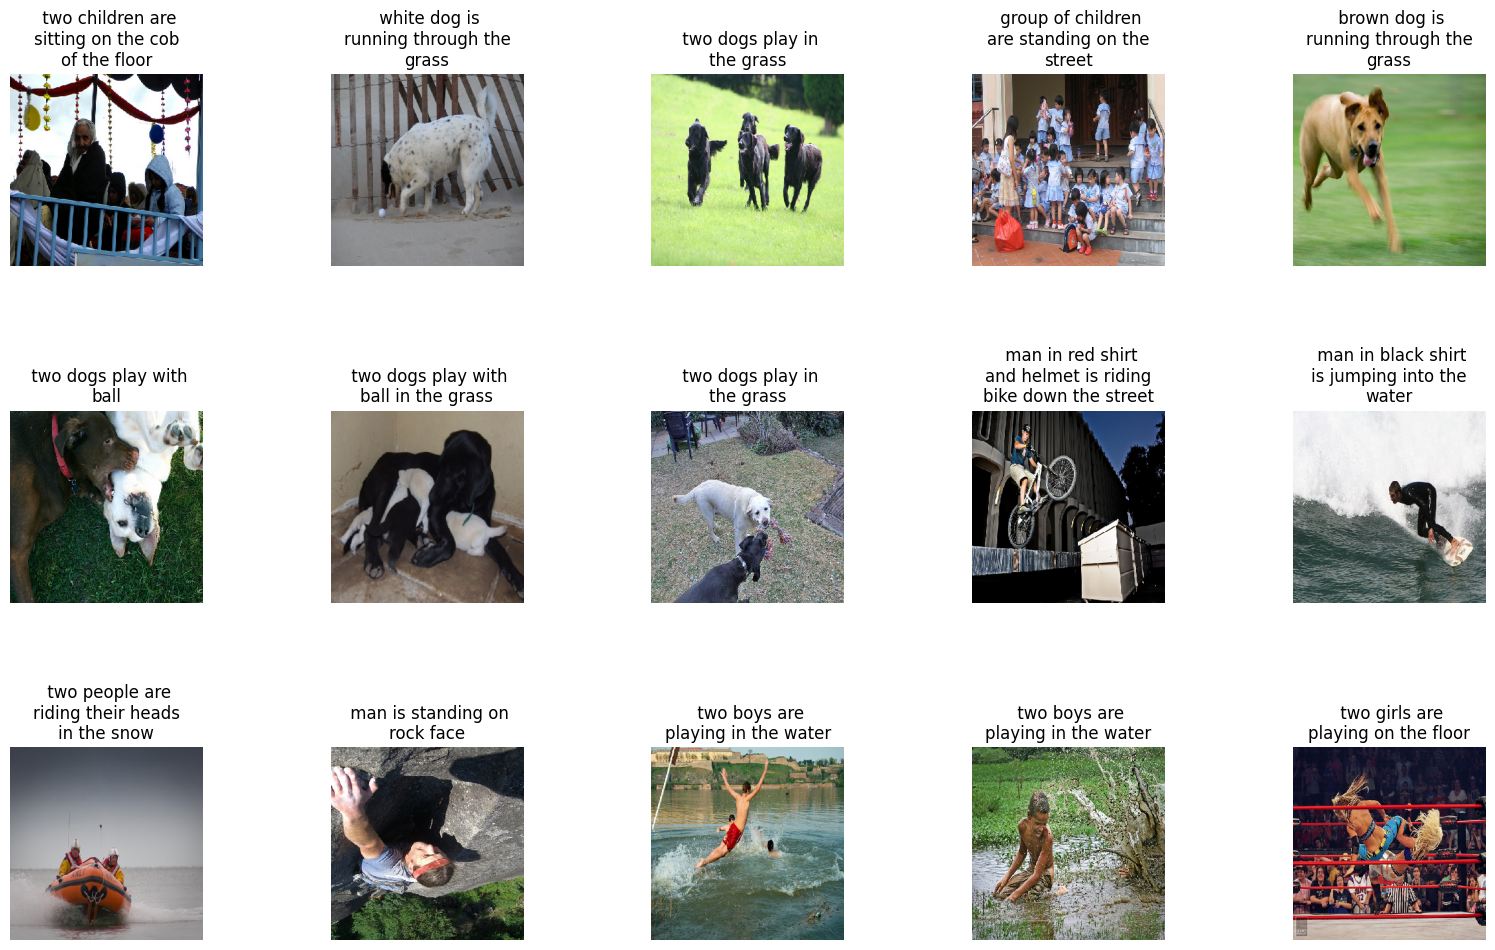

In [16]:
def greedy_search(model, img, tokenizer, max_length, index_to_word):
    in_text = 'startseq'
    for _ in range(max_length):
        # Convert input sequence to integers using the tokenizer
        sequence = tokenizer.texts_to_sequences([in_text])[0]

        # Pad input sequence
        sequence = pad_sequences([sequence], maxlen=max_length)

        # Predict the next word probabilities
        yhat = model.predict([img, sequence], verbose=0)

        # Get the index of the word with the highest probability
        yhat = np.argmax(yhat)

        # Map the index to the word
        word = index_to_word[yhat]

        # Stop if cannot map the word or if it is an end token
        if word is None or word == 'endseq':
            break

        # Add the predicted word to the input sequence
        in_text += ' ' + word

    return in_text




def read_image(path, img_size=299):
    img = load_img(path, target_size=(img_size, img_size))
    img = img_to_array(img)/255.

    return img


# Invert the word_index to create a dictionary of index to word
index_to_word = {index: word for word, index in word_index.items()}

# Generate a sample of the test image dataset
random_test_images = random.choices(list(encoded_test_images.keys()), k=15)

for id in random_test_images:
    print(id, test_captions[id])

plt.figure(figsize=(20, 20))
i = 0
for id in random_test_images:
    i += 1
    img = encoded_test_images[id].reshape((1,2048))
    caption = greedy_search(model, img, tokenizer, max_length, index_to_word)
    caption = caption.replace('startseq', '')

    plt.subplot(5 , 5, i)
    plt.subplots_adjust(hspace=0.75)
    image = read_image(image_path + id)
    text = textwrap.fill(caption, 20)
    plt.imshow(image)
    plt.title(text)
    plt.axis("off")


Results
As we can clearly see there is some redundant caption generation e.g. Dog running through the water, overusage of blue shirt for any other coloured cloth

The model performance can be further improved by training on more data and using attention mechanism so that our model can focus on relevant areas during the text generation
We can also leverage the interprettability of the attention mechanism to understand which areas of the image leads to the generation of which word

The Bilingual Evaluation Understudy Score, or BLEU for short, is a metric that evaluates the accuracy of a generated sentence compared to a reference sentence.

The approach works by counting matching n-grams in the predicted sentence to n-grams in the reference sentence. The comparison is independent of word order. I shall use the implementation of the BLEU score that is provided in the Natural Language Toolkit library (NLTK).




---

### **5.2 Beam Search**

- Implement a Beam Search algorithm and compare the performance with Greedy Search

In [ ]:
# Beam search code

---

# **6. Performance**


### **6.1 Perplexity scores**

- Examine the performance of the model on the test dataset




Another metric to look at when image captioning with an LSTM, is perplexity. This measures how well the predicted probabilities assigned to each word align with the true distribution of the data.

Perplexity measures that quality of a language model's predictions. A lower perplexity value indicates better performance, as it implies that the model is more certain about its predictions.

To measure perplexity on a validation set:

Tokenization: Tokenize the captions in your validation set using the same tokenizer used during training.

Padding: Ensure that all sequences are of the same length by padding or truncating as necessary.

Predictions: Use your trained LSTM model to generate predictions for each token in the validation set captions.

Calculate Perplexity: Use the predicted probabilities to calculate the perplexity for each sequence, and then average over all sequences.
(see screenprint of formula - 30th Jan)



To improve perplexity:

Model Architecture: Experiment with different LSTM architectures, such as stacking multiple layers or using bidirectional LSTMs.

Embedding Size: Adjust the size of the embedding layer.

Training Parameters: Tune hyperparameters like learning rate, batch size, and the number of training epochs.

Regularization: Apply dropout or other regularization techniques to prevent overfitting.

Model Size: Increase the complexity of your model if necessary.

Remember to validate any changes using a separate validation set to avoid overfitting to the training set. Perplexity is just one metric, so consider other qualitative aspects of your generated captions as well.

In [24]:
def calculate_perplexity(predictions, actual_labels):
    # Assuming predictions and true_labels are numpy arrays
    num_words = predictions.shape[0]
    perplexity = 2 ** (-np.sum(np.log2(predictions[np.arange(num_words), actual_labels])) / num_words)

    return perplexity

'''
val_actual, val_predicted = [], []

for id in tqdm(val_captions):
    # get actual caption
    captions = val_captions[id]
    # predict the caption for image
    img = encoded_val_images[id].reshape((1,2048))
    y_pred = greedy_search(model, img, tokenizer, max_length, index_to_word)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    val_actual.append(actual_captions)
    val_predicted.append(y_pred)

# store embedding_matrix in pickle
pickle.dump(val_actual, open(f'{working_directory}val_actual.pkl', 'wb'))
pickle.dump(val_predicted, open(f'{working_directory}val_actual.pkl', 'wb'))

# load embedding_matrix from pickle
with open(f'{working_directory}val_actual.pkl', 'rb') as f:
    val_actual = pickle.load(f)
with open(f'{working_directory}val_actual.pkl', 'rb') as f:
    val_predicted = pickle.load(f)
'''

print(type(val_predicted))
print(type(val_actual))

print(val_predicted[:3])
print(val_actual[:3])

print(calculate_perplexity(np.array(val_predicted), np.array(val_actual)))




# Function to generate word probabilities for a given input sequence
def generate_word_probabilities(model, photo, input_sequence, max_length, tokenizer, vocab_size):
    input_seq = tokenizer.texts_to_sequences([input_sequence])[0]
    input_seq = pad_sequences([input_seq], maxlen=max_length)

    # Predict the probabilities for the next word
    prob_array = model.predict([np.array([photo]), input_seq])[0]

    # Assuming you're using softmax activation in the output layer
    word_probabilities = prob_array

    return word_probabilities

# Example usage
img_id = "example_image_id"  # Replace with the actual image id
photo = encoded_train_images[img_id]  # Replace with the actual image encoding
input_sequence = "startseq"  # Replace with the actual input sequence

# Get word probabilities
word_probabilities = generate_word_probabilities(model, photo, input_sequence, max_length, tokenizer, vocab_size)

# Display the word probabilities
for word_idx, prob in enumerate(word_probabilities):
    word = tokenizer.index_word[word_idx]
    print(f"Word: {word}, Probability: {prob}")


<class 'list'>
<class 'list'>
[['startseq', 'two', 'children', 'are', 'playing', 'on', 'the', 'grass'], ['startseq', 'two', 'dogs', 'play', 'with', 'ball', 'in', 'the', 'grass'], ['startseq', 'black', 'dog', 'is', 'running', 'through', 'the', 'water']]
[['startseq', 'two', 'children', 'are', 'playing', 'on', 'the', 'grass'], ['startseq', 'two', 'dogs', 'play', 'with', 'ball', 'in', 'the', 'grass'], ['startseq', 'black', 'dog', 'is', 'running', 'through', 'the', 'water']]


<ipython-input-24-c9fa14ff9a63>:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(calculate_perplexity(np.array(val_predicted), np.array(val_actual)))


IndexError: arrays used as indices must be of integer (or boolean) type

### **6.2 BLEU scores**

- Examine the performance of the model on the test dataset
- Implement the BLEU Score to measure the quality of the model generated captions


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
# Use test dataset for this evaluation
test_actual, test_predicted = [], []

for id in tqdm(test_captions):
    # get actual caption
    captions = test_captions[id]
    # predict the caption for image
    img = encoded_test_images[id].reshape((1,2048))
    y_pred = greedy_search(model, img, tokenizer, max_length, index_to_word)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    test_actual.append(actual_captions)
    test_predicted.append(y_pred)

# Calculate BLEU scores
print(f'BLEU-1: {corpus_bleu(test_actual, test_predicted, weights=(1.0, 0, 0, 0))}')
print(f'BLEU-2: {corpus_bleu(test_actual, test_predicted, weights=(0.5, 0.5, 0, 0))}')
print(f'BLEU-3: {corpus_bleu(test_actual, test_predicted, weights=(0.33, 0.33, 0.33, 0))}')
print(f'BLEU-4: {corpus_bleu(test_actual, test_predicted, weights=(0.25, 0.25, 0.25, 0.25))}')

# Need to build a dictionary of BLEU scores to record result after every epoch: {'BLEU-1': [epoch1_score, epoch2_score, ...], 'BLEU-2': [...], etc.}
# Save it to pickle.
# Then restore the results and plot


  0%|          | 0/809 [00:00<?, ?it/s]

BLEU-1: 0.5040217487098134
BLEU-2: 0.3124084732204792
BLEU-3: 0.20225130233440372
BLEU-4: 0.12246522420952591


BLEU-1: 0.521526
BLEU-2: 0.297970
BLEU Score is used to evaluate the predicted text against a reference text, in a list of tokens.

The reference text contains all the words appended from the captions data (actual_captions)

A BLEU Score more than 0.4 is considered a good result, for a better score increase the no. of epochs accordingly.

** TEST a model traijned over more epochs - see if BLEU score is better despite loss/accuracy of the validation set being worse


---

### **6.2 Model Improvement**

- Provide options for improving the performance for the model and outline what will be tested in [STAGE 2: Optimize CNN-RNN Model](https://github.com/mhodierne1402/data-science-ml-portfolio/blob/main/image-caption-generator/Image_Caption_Generator_CNN_RNN_Model_STAGE_2_Optimize.ipynb)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

generate_caption("1001773457_577c3a7d70.jpg")
generate_caption("1002674143_1b742ab4b8.jpg")


---

# **7. Conclusions**

- Summary of the final baseline model and the best performance achieved
- Recommendations for optimizing the model further
- Summary of insights and learning during the project work

When evaluating an image captioning model quantitatively, you can consider a variety of metrics beyond accuracy, loss, perplexity, and BLEU scores. Here are some additional quantitative metrics to consider:

METEOR (Metric for Evaluation of Translation with Explicit ORdering): METEOR is another automatic metric for evaluating the quality of machine-generated text. It takes into account precision, recall, stemming, synonymy, and stemming.

ROUGE (Recall-Oriented Understudy for Gisting Evaluation): ROUGE is a set of metrics used for automatic evaluation of machine-generated text summaries. It includes metrics like ROUGE-N (precision, recall, and F1 score for n-grams) and ROUGE-L (longest common subsequence).

CIDEr (Consensus-based Image Description Evaluation): CIDEr is a metric that measures the consensus between the generated captions and human-generated references. It aims to capture diversity and consensus in the generated captions.

SPICE (Semantic Propositional Image Caption Evaluation): SPICE is a metric designed to evaluate the semantic content of image captions. It assesses the quality of captions based on semantic relationships between objects and their properties.

WER (Word Error Rate): WER calculates the edit distance between the generated caption and the reference caption in terms of word substitutions, insertions, and deletions. It provides a measure of how closely the generated caption matches the reference.

Precision, Recall, F1 Score: These traditional metrics can be applied to evaluate the precision, recall, and F1 score of the generated captions concerning the reference captions.

Sentence-BLEU: While BLEU evaluates n-gram precision, Sentence-BLEU calculates the BLEU score for the entire sentence. It may provide a different perspective on the quality of the generated captions.


Evaluate perplexity of LSTM on validation set during training.
To improve performance, hyperparameters to tune are: CNN architecture depth, LSTM hidden units, learning rates, dropout rates, batch size, and training epochs.
Can also try different optimization methods like RMSprop, Adam. And regularization techniques like early stopping, weight decay.




Comments of improving performance:

Number of epochs - test and compare
compare accuracy on train set anmd test set
be clear anbout how val and test set were used

what hyperparameters can be tuned?

- glove embedding dimensions
- number epochs
- size of vocabuklary - remove infrequent use. words

what measures. of success do I use?

Alternatives to try:
Greedy vs beam
text2Vector? instead of GloVe

Add full documentation and explanation


THINGS TO TEST
- mock up how my results data is going to look
- set up another notebook for improvements - use this for baseline model only
TRY CHNAGING ENCODER SETUP FIRST - reduce vocab, encoders etc - measure metrics after each change. THEN try BEAM search
- Beam Search
- reducing vocab
- increasing GloVe vector size
- using the alternative text2Vector to GloVe (maybe present them the other. way round)
try https://code.google.com/archive/p/word2vec/
Search in the page for 'GoogleNews-vectors-negative300.bin.gz' and click the link to download.

- increased EPOCHs to see if BLEU score is impacted - increase one at a time - run BLUE after each - then map BLEU by Epoch to see correlation with accuracy/loss (remove early stopping)
- try alterative to InceptionV3

End up with a new baseline against which I  can test alternative architectures.

Keep dataset and performance metrics constant throughout.



Building a Convolutional Neural Network from scratch was impractical for completing this project. However, I do want to build one from scratch to see exactly how the neural network components contribute to a successful implementation of computer vision. I will undertake a separate project that performs a binary classification of an image set and explore different options for CNN design. A medical application with the aim of confirming the presence or absence of a particular condition from looking at X-rays would be interesting to develop.





